## Лабораторная_работа_№7_Машинное_обучение_ДПИ22_1с_Берникова_Валерия

### Цель работы

Познакомиться с основными задачами и приемами предварительного анализа и обработки данных для целей машинного обучения

Предварительная обработка данных является неотъемлемым этапом машинного обучения, поскольку качество данных и полезная информация, которую можно извлечь из них, напрямую влияют на способность нашей модели к обучению; поэтому чрезвычайно важно, чтобы мы предварительно обработали наши данные, прежде чем вводить их в нашу модель.

## Задания для самостоятельного выполнения

1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML5.4%20EDA/titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

Доля выживших от общего числа пассажиров: 0.38


([<matplotlib.patches.Wedge at 0x151497f5a20>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Выжившие'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Умершие')])

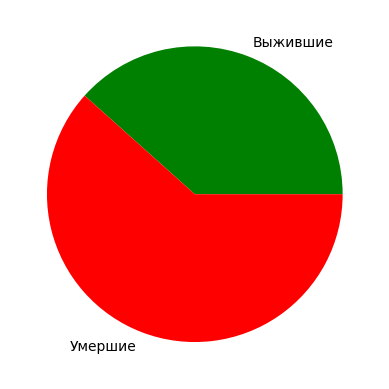

In [67]:
died, surv = data['Survived'].value_counts()
print('Доля выживших от общего числа пассажиров:', round(surv/(died+surv), 2))
plt.pie([surv/(died+surv), died/(surv+died)], labels=['Выжившие', 'Умершие'], colors=['green', 'red'])

4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

Доля выживших мужчин: 0.32
Доля выживших женщин: 0.68


([<matplotlib.patches.Wedge at 0x15149e2c6a0>,
 [Text(0.5931585112380521, 0.9263708655532393, 'Мужчины'),
  Text(-0.5931584245049494, -0.9263709210887432, 'Женщины')])

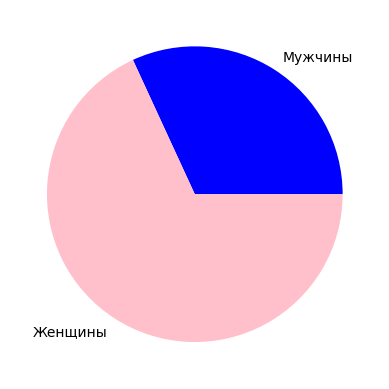

In [68]:
man_alive = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]
portion_m_a=len(man_alive)/surv
print('Доля выживших мужчин:', round(portion_m_a, 2))
print('Доля выживших женщин:', round(1-portion_m_a, 2))
plt.pie([portion_m_a, 1-portion_m_a], labels=['Мужчины', 'Женщины'], colors=['blue', 'pink'])

5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Ответ: Нет, поскольку номер билета или каюты, имя или номер пассажира вряд ли могут пригодиться для существенного анализа имеющейся информации, объясняющего или проверяющего те или иные закономерности.

In [69]:
mod_data = data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)

In [70]:
mod_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

0.096 - таким образом, обнаружена незначительная положительная взаимосвязь между возрастом пассажира и ценой билета.


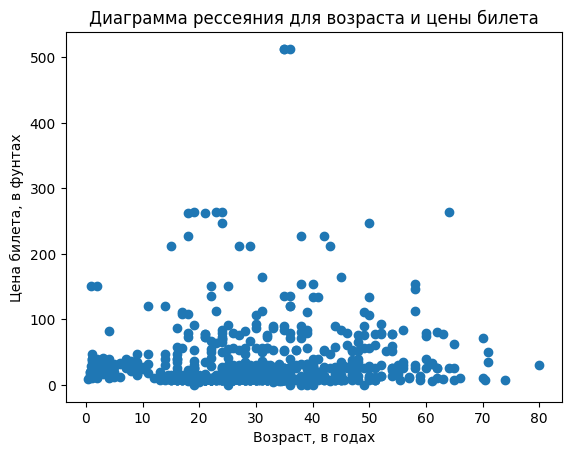

In [71]:
print(round(data['Age'].corr(data['Fare']), 3), '- таким образом, обнаружена незначительная положительная взаимосвязь между возрастом пассажира и ценой билета.')

plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Возраст, в годах')
plt.ylabel('Цена билета, в фунтах')
plt.title('Диаграмма рессеяния для возраста и цены билета')
plt.show()

7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [72]:
print(round(data['Survived'].corr(data['Fare']), 3), '- действительно, пассажиры с более дорогими билетами выживали чаще, поскольку им выдавались шлюпки в первую очередь.')

0.257 - действительно, пассажиры с более дорогими билетами выживали чаще, поскольку им выдавались шлюпки в первую очередь.


In [73]:
print(round(data['Survived'].corr(data['Pclass']), 3), '- действительно, пассажиры с более низким классом выживали реже, поскольку им выдавались шлюпки в последнюю очередь.')

-0.338 - действительно, пассажиры с более низким классом выживали реже, поскольку им выдавались шлюпки в последнюю очередь.


8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [76]:
data['Fare'].min()

0.0

In [77]:
data['Fare'].max()

512.3292

In [78]:
round(data['Fare'].mean(), 2)

32.2

In [79]:
data['Fare'][data['Embarked'] == 'S'].min()

0.0

In [80]:
data['Fare'][data['Embarked'] == 'S'].max()

263.0

In [81]:
round(data['Fare'][data['Embarked'] == 'S'].mean(), 2)

27.08

9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

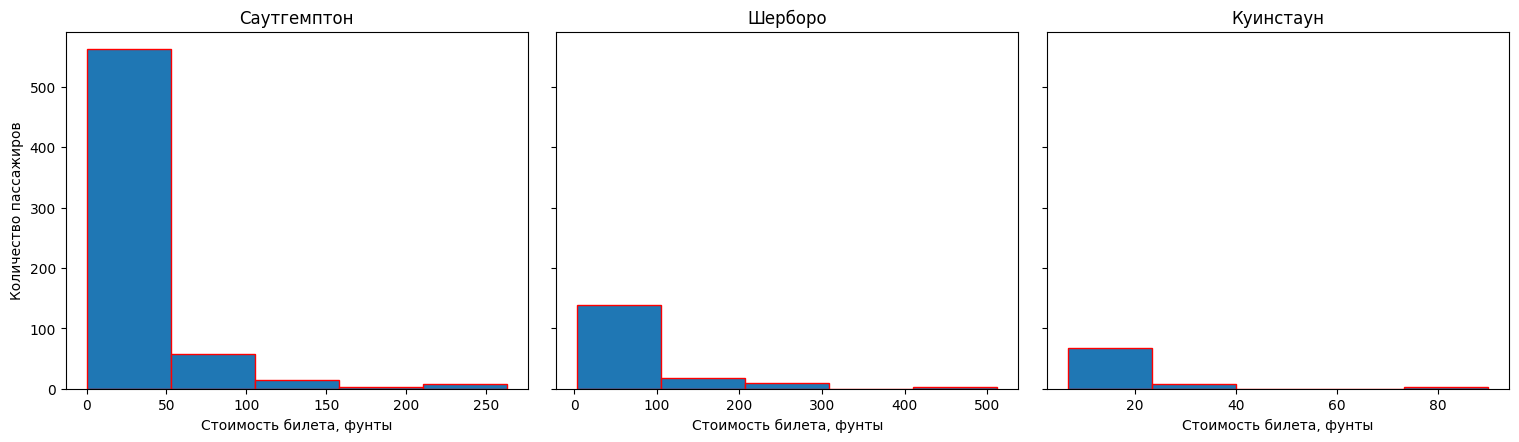

In [82]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 4))

fig.tight_layout(pad=0.5)
ax[0].set_ylabel('Количество пассажиров')

ax[0].hist(data['Fare'][(data['Embarked'] == 'S')], bins=5, edgecolor='red')
ax[0].set_xlabel('Стоимость билета, фунты')
ax[0].set_title('Саутгемптон')

ax[1].hist(data['Fare'][(data['Embarked'] == 'C')], bins=5, edgecolor='red')
ax[1].set_xlabel('Стоимость билета, фунты')
ax[1].set_title('Шерборо')

ax[2].hist(data['Fare'][(data['Embarked'] == 'Q')], bins=5, edgecolor='red')
ax[2].set_xlabel('Стоимость билета, фунты')
ax[2].set_title('Куинстаун')

plt.show()

10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [83]:
total_passengers = surv + died
data_proportion = (surv + died) / total_passengers

print("Общее количество пассажиров на Титанике:", total_passengers)
print("Количество выживших пассажиров:", surv)
print("Доля представленного набора данных от всей генеральной совокупности:", round(data_proportion, 2))

Общее количество пассажиров на Титанике: 891
Количество выживших пассажиров: 342
Доля представленного набора данных от всей генеральной совокупности: 1.0


11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

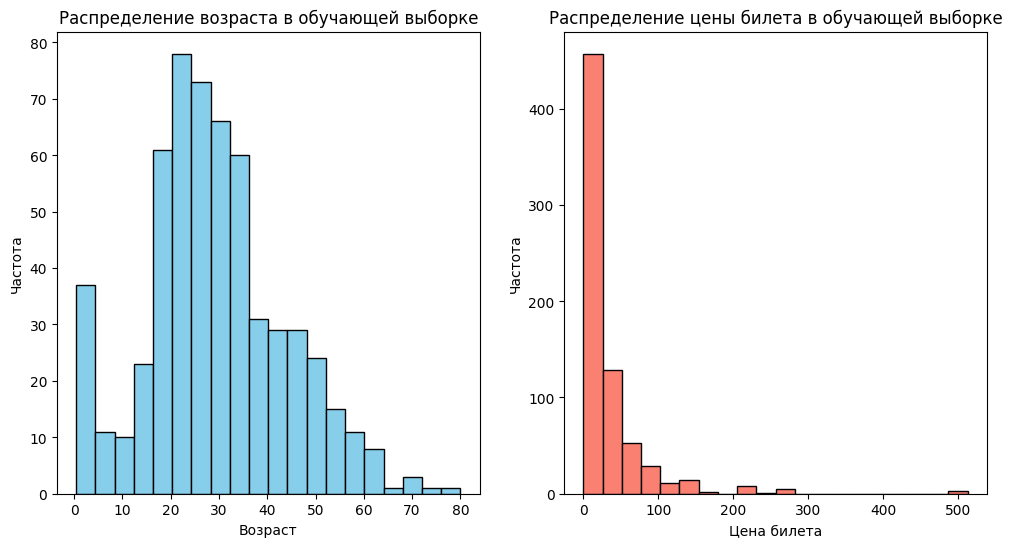

In [84]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Разделение на обучающую и тестовую выборку (например, 80% обучающей и 20% тестовой)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визуализация распределения некоторых атрибутов и целевой переменной
# Например, можно построить гистограммы для возраста и цены билета
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X_train['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста в обучающей выборке')

plt.subplot(1, 2, 2)
plt.hist(X_train['Fare'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Цена билета')
plt.ylabel('Частота')
plt.title('Распределение цены билета в обучающей выборке')

plt.show()


12. Сбалансируйте классы в исходном датасете двумя способами:

13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [85]:
# Предположим, что '0' обозначает класс "Умершие", а '1' - класс "Выжившие"
# Найдем индексы объектов мажоритарного класса для удаления
died_indices = data[data['Survived'] == 0].index
survived_indices = data[data['Survived'] == 1].index

# Выберем случайные индексы объектов мажоритарного класса для удаления
import random
random_died_indices = random.sample(list(died_indices), len(survived_indices))

# Удалим лишние объекты мажоритарного класса
balanced_data = data.drop(random_died_indices)

# Проверим, что классы теперь сбалансированы
balanced_data['Survived'].value_counts()

Survived
1    342
0    207
Name: count, dtype: int64

14. Добавьте в выборку дубликаты миноритарного класса.

In [86]:
# Найдем индексы объектов миноритарного класса для добавления дубликатов
minority_class_indices = data[data['Survived'] == 1].index

# Добавим дубликаты миноритарного класса
duplicates = data.loc[minority_class_indices].sample(n=(data['Survived'] == 0).sum(), replace=True)

# Объединим исходный датасет с добавленными дубликатами
balanced_data = pd.concat([data, duplicates])

# Перемешаем данные, чтобы гарантировать случайный порядок
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

# Проверим, что классы теперь сбалансированы
balanced_data['Survived'].value_counts()


Survived
1    891
0    549
Name: count, dtype: int64

: 

15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.